In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl

data= pd.read_csv('https://raw.githubusercontent.com/SrWannapa/DADS5001_miniProject_6420422008/main/project_2564-2022-07-08.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240 entries, 0 to 5239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RowNo                5240 non-null   int64  
 1   ProjectID            5240 non-null   int64  
 2   ProjectNameTH        5240 non-null   object 
 3   ProjectNameEN        4834 non-null   object 
 4   ProjectType          5240 non-null   object 
 5   Headname             4856 non-null   object 
 6   Projectstatus        5240 non-null   object 
 7   DepartmentTH         5240 non-null   object 
 8   SubmitDepartmentth   5001 non-null   object 
 9   SubmitDepProvinceID  4999 non-null   float64
 10  SubmitDepProvinceTH  4999 non-null   object 
 11  ProjectYearSubmit    5240 non-null   int64  
 12  OECD1                5098 non-null   object 
 13  OECD2                5070 non-null   object 
 14  ProjectKeyword       4651 non-null   object 
 15  ProjectKeywordEng    4644 non-null   o

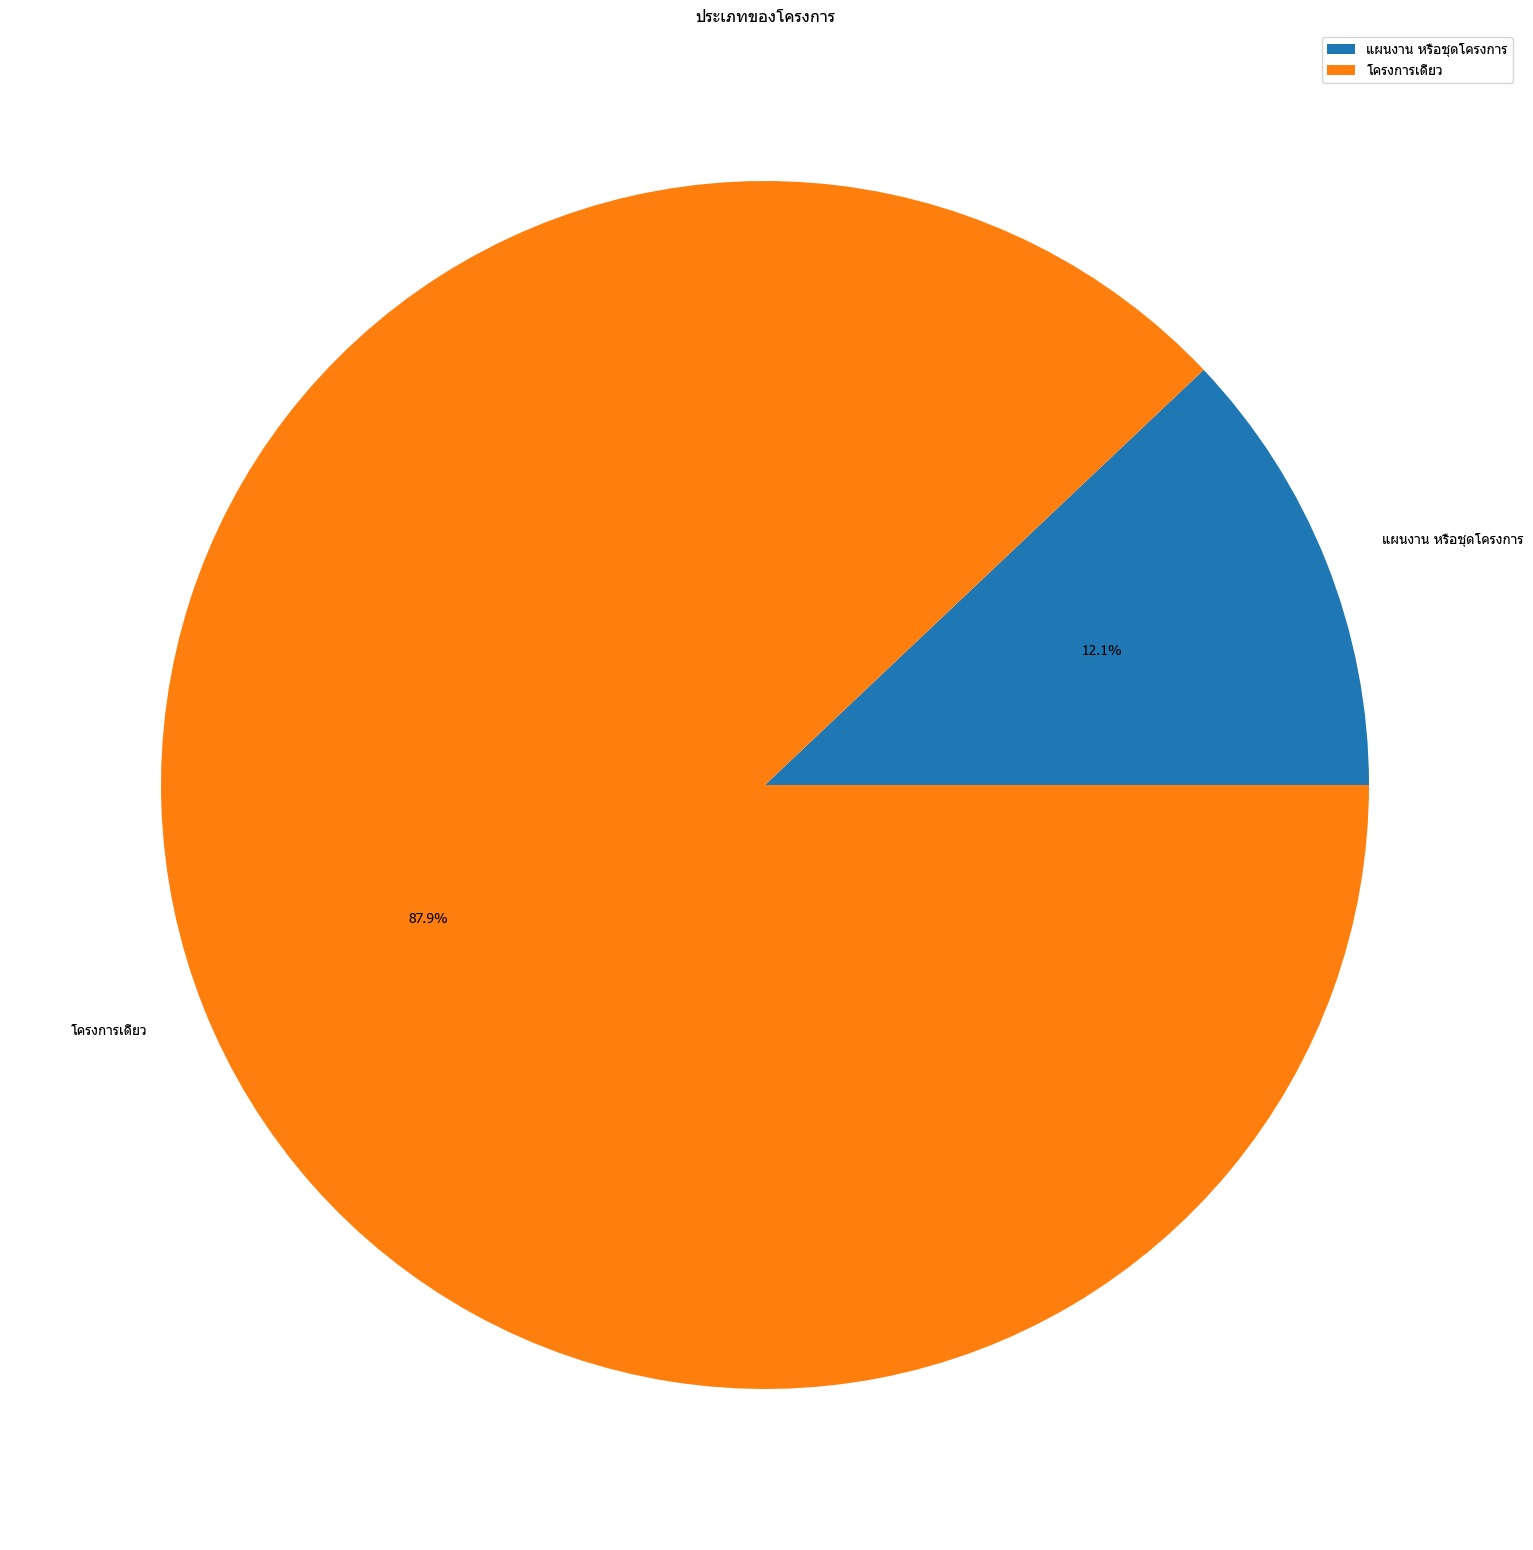

In [3]:
protype = data.groupby('ProjectType')['ProjectType'].count().to_frame('counttype')
protype.reset_index()
plt.rcParams['font.family']='Tahoma'
plt.figure(figsize = (20,20),dpi=100)
plt.pie(protype['counttype'],autopct = '%.1f%%', labels = ['แผนงาน หรือชุดโครงการ','โครงการเดี่ยว'])
plt.legend(['แผนงาน หรือชุดโครงการ','โครงการเดี่ยว'],loc="upper right")
plt.title('ประเภทของโครงการ')
plt.show()

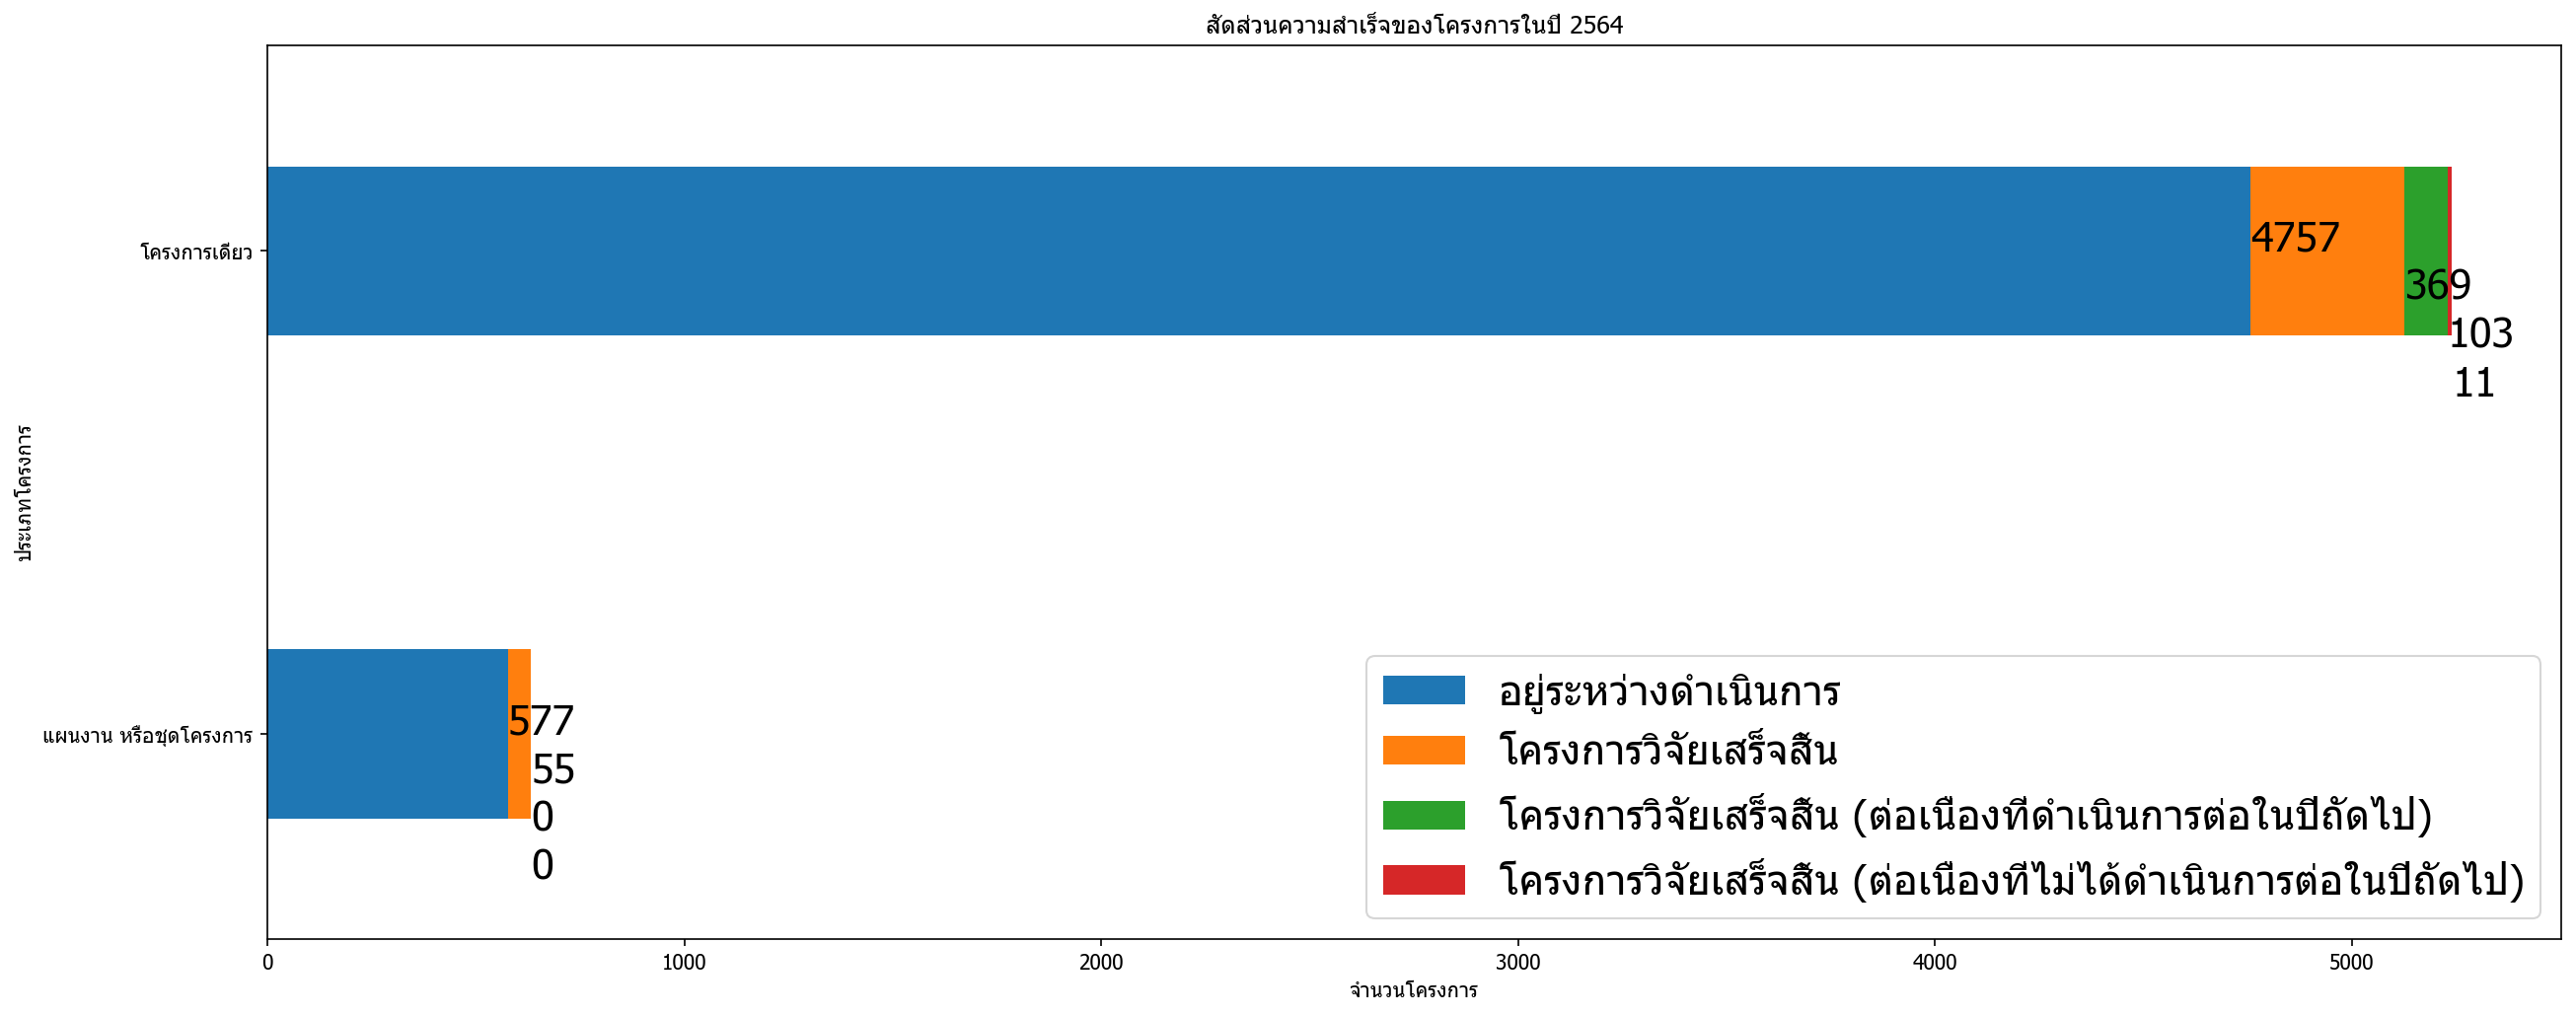

In [4]:
succase=  data.loc[ : ,['ProjectType','Projectstatus']]
ans2 = succase.groupby(['ProjectType','Projectstatus']).size().to_frame('AmountStatus')
ans2 = ans2.reset_index()

mm = ans2.groupby(['ProjectType','Projectstatus']).sum().groupby(level=[1]).cumsum().unstack()
mm = mm.fillna(0)
plt.figure(figsize=(20,8),dpi=150)
mm.plot.barh(ax=plt.axes(), stacked=True, width = 0.35)

plt.xlabel('จำนวนโครงการ')
plt.ylabel('ประเภทโครงการ')
plt.title('สัดส่วนความสำเร็จของโครงการในปี 2564')
legend = ['อยู่ระหว่างดำเนินการ',
          'โครงการวิจัยเสร็จสิ้น',
          'โครงการวิจัยเสร็จสิ้น (ต่อเนื่องที่ดำเนินการต่อในปีถัดไป)',
          'โครงการวิจัยเสร็จสิ้น (ต่อเนื่องที่ไม่ได้ดำเนินการต่อในปีถัดไป)']
plt.legend(legend,loc='lower right', fontsize = 20)

valueold = 0
i = 0
for index, value in enumerate(list(list(mm.loc['แผนงาน หรือชุดโครงการ']))):
    plt.text(value+valueold, i, str(int(value)), fontsize=20)
    valueold = value+valueold
    i = i-0.1
    
valueold = 0
i = 1
for index, value in enumerate(list(list(mm.loc['โครงการเดี่ยว']))):
    plt.text(value+valueold, i, str(int(value)), fontsize=20)
    valueold = value+valueold
    i = i-0.1

plt.show()

In [5]:
ans2['suc_percent'] = ans2['AmountStatus'] / ans2.groupby('ProjectType')['AmountStatus'].transform('sum')
ans2

,ProjectType,Projectstatus,AmountStatus,suc_percent
0,แผนงาน หรือชุดโครงการ,อยู่ระหว่างดำเนินการ,577,0.912975
1,แผนงาน หรือชุดโครงการ,โครงการวิจัยเสร็จสิ้น,55,0.087025
2,โครงการเดี่ยว,อยู่ระหว่างดำเนินการ,4180,0.907118
3,โครงการเดี่ยว,โครงการวิจัยเสร็จสิ้น,314,0.068142
4,โครงการเดี่ยว,โครงการวิจัยเสร็จสิ้น (ต่อเนื่องที่ดำเนินการต่...,103,0.022352
5,โครงการเดี่ยว,โครงการวิจัยเสร็จสิ้น (ต่อเนื่องที่ไม่ได้ดำเนิ...,11,0.002387


In [6]:
Subject = data.loc[ : ,['OECD1','OECD2']]
tt = Subject.fillna(value={'OECD1':'ไม่ระบุสาขาวิชาหลัก','OECD2':'ไม่ระบุสาขาวิชารอง'})
sub = tt.groupby(['OECD1','OECD2'],dropna=False).size().to_frame('AmoEachSub')
sub

AmoEachSub
OECD1                        OECD2                                        
มนุษยศาสตร์                  ประวัติศาสตร์และโบราณคดี                   13
                             ปรัชญา จริยธรรมและศาสนา                     6
                             ภาษาและวรรณคดี                             18
                             มนุษยศาสตร์อื่นๆ                           56
                             ศิลปะ                                      35
วิทยาศาสตร์การแพทย์และสุขภาพ การแพทย์คลินิก                            122
                             การแพทย์พื้นฐาน                            53
                             วิทยาศาสตร์ทางการแพทย์อื่นๆ               203
                             วิทยาศาสตร์สุขภาพ                         334
                             เทคโนโลยีชีวภาพทางด้านการแพทย์            108
วิทยาศาสตร์ธรรมชาติ          คณิตศาสตร์                                 69
                             วิทยาศาสตร์กายภาพ                         110
                             วิทยาศาสตร์คอมพิวเตอร์และสารสนเทศ          36
                             วิทยาศาสตร์ชีวภาพ                         120
                             วิทยาศาสตร์ธรรมชาติอื่นๆ                   85
                             วิทยาศาสตร์สิ่งแวดล้อม                    101
                             วิทยาศาสตร์เคมี                           111
วิศวกรรมและเทคโนโลยี         นาโนเทคโนโลยี                              23
                             วิศวกรรมการแพทย์                           51
                             วิศวกรรมสารสนเทศ                           70
                             วิศวกรรมสิ่งแวดล้อม                        33
                             วิศวกรรมเคมี                               52
                             วิศวกรรมเครื่องกล                          42
                             วิศวกรรมและเทคโนโลยีอื่นๆ                 205
                             วิศวกรรมโยธา                               22
                             วิศวกรรมโลหะและวัสดุ                       46
                             วิศวกรรมไฟฟ้าอิเล็กทรอนิกส์                69
                             เทคโนโลยีชีวภาพสิ่งแวดล้อม                 39
                             เทคโนโลยีชีวภาพอุตสาหการ                   33
                             เทคโนโลยีพลังงาน                           35
สังคมศาสตร์                  จิตวิทยา                                   20
                             นิติศาสตร์                                 29
                             นิเทศศาสตร์และสื่อสารมวลชน                 13
                             ภูมิศาสตร์ทางสังคมและเศรษฐกิจ              24
                             รัฐศาสตร์                                  23
                             ศึกษาศาสตร์                               104
                             สังคมศาสตร์                               285
                             สังคมศาสตร์อื่นๆ                          126
                             เศรษฐศาสตร์                                73
อื่นๆ                        อื่นๆ                                     335
เกษตรศาสตร์                  ประมง                                     123
                             ป่าไม้                                     85
                             วิทยาศาสตร์การเกษตร                        75
                             วิทยาศาสตร์ทางด้านการเกษตรอื่นๆ            70
                             สัตวศาสตร์                                 29
                             สัตวแพทยศาสตร์                             22
                             เกษตรศาสตร์                              1241
                             เทคโนโลยีชีวภาพทางด้านการเกษตร             93
                             ไม่ระบุสาขาวิชารอง                         28
ไม่ระบุสาขาวิชาหลัก          ไม่ระบุสาขาวิชารอง                        142

Text(0.5, 1.0, '10 อันดับสูงสุดของสาขาวิชาในการจัดทำโครงการในปี 2564')

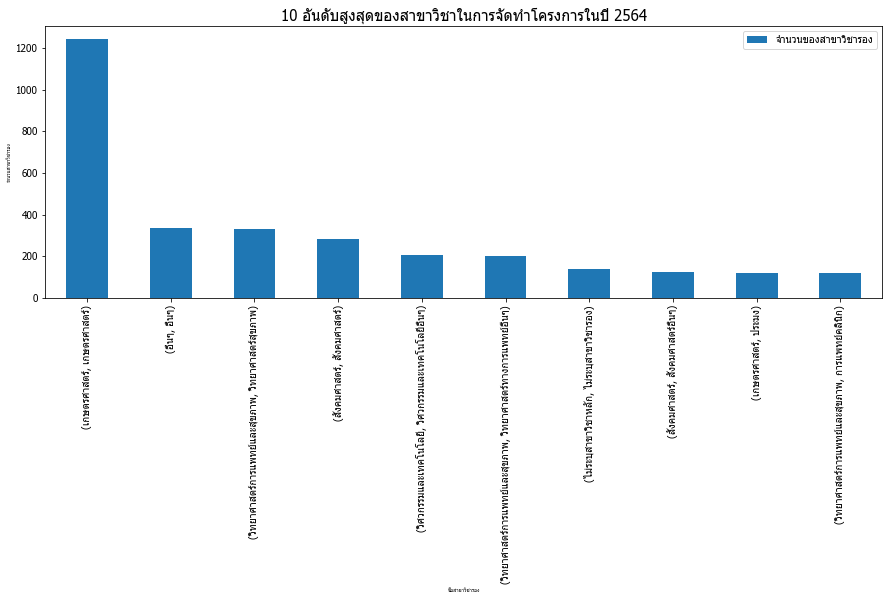

In [7]:
fortop10=sub.sort_values('AmoEachSub',ascending=False)
top10 = fortop10.nlargest(n=10, columns = ["AmoEachSub"])
top10.plot.bar(figsize=(15, 5),fontsize=10)
plt.xlabel('ชื่อสาขาวิชารอง', fontsize=5)
plt.ylabel('จำนวนสาขาวิชารอง', fontsize=5)
plt.legend(['จำนวนของสาขาวิชารอง'],loc='upper right', fontsize=10)
plt.title('10 อันดับสูงสุดของสาขาวิชาในการจัดทำโครงการในปี 2564' ,fontsize = 15)

In [8]:
data['DepartmentTH'].unique()

array(['กรมการข้าว', 'กรมการแพทย์',
       'กรมการแพทย์แผนไทยและการแพทย์ทางเลือก', 'กรมควบคุมโรค',
       'กรมชลประทาน', 'กรมทรัพยากรทางทะเลและชายฝั่ง', 'กรมทรัพยากรน้ำ',
       'กรมทางหลวง', 'กรมประมง ', 'กรมปศุสัตว์',
       'กรมป้องกันและบรรเทาสาธารณภัย', 'กรมป่าไม้',
       'กรมฝนหลวงและการบินเกษตร', 'กรมพลศึกษา', 'กรมพัฒนาที่ดิน',
       'กรมพินิจและคุ้มครองเด็กและเยาวชน', 'กรมวิชาการเกษตร ',
       'กรมวิทยาศาสตร์การแพทย์', 'กรมวิทยาศาสตร์บริการ ',
       'กรมวิทยาศาสตร์และเทคโนโลยีกลาโหม', 'กรมศิลปากร',
       'กรมส่งเสริมการเกษตร', 'กรมส่งเสริมคุณภาพสิ่งแวดล้อม',
       'กรมส่งเสริมวัฒนธรรม', 'กรมสนับสนุนบริการสุขภาพ ',
       'กรมสอบสวนคดีพิเศษ', 'กรมสุขภาพจิต ', 'กรมหม่อนไหม', 'กรมอนามัย ',
       'กรมอุตสาหกรรมพื้นฐานและการเหมืองแร่',
       'กรมอุทยานแห่งชาติ สัตว์ป่า และพันธุ์พืช', 'จุฬาลงกรณ์มหาวิทยาลัย',
       'มหาวิทยาลัยการกีฬาแห่งชาติ', 'มหาวิทยาลัยกาฬสินธุ์',
       'มหาวิทยาลัยเกษตรศาสตร์', 'มหาวิทยาลัยขอนแก่น ',
       'มหาวิทยาลัยเชียงใหม่ ', 'มหาวิทยาลัยทักษิณ',

In [9]:
data.groupby(['SubmitDepartmentth','DepartmentTH','OECD1'],dropna=False).size().to_frame('DepartmentSup')

DepartmentSup
SubmitDepartmentth               DepartmentTH                                       OECD1                                      
 บริษัท โกลบอล อาร์แอนด์ดี จำกัด หน่วยบริหารและจัดการทุนด้านการเพิ่มความสามารถใน... วิศวกรรมและเทคโนโลยี                      1
-                                กรมประมง                                           เกษตรศาสตร์                               1
                                 กรมปศุสัตว์                                        เกษตรศาสตร์                               1
                                 สถาบันวิจัยระบบสาธารณสุข (สวรส.)                   วิทยาศาสตร์การแพทย์และสุขภาพ              2
                                                                                    เกษตรศาสตร์                               2
...                                                                                                                         ...
NaN                              สำนักงานนวัตกรรมแห่งชาติ (องค์การมหาชน) (สนช.)     อื่นๆ                                    56
                                                                                    เกษตรศาสตร์                              21
                                 สำนักงานปลัดกระทรวงสาธารณสุข                       วิทยาศาสตร์การแพทย์และสุขภาพ              2
                                 สำนักงานปลัดกระทรวงเกษตรและสหกรณ์                  เกษตรศาสตร์                               1
                                 สำนักงานพัฒนาการวิจัยการเกษตร (องค์การมหาชน) (ส... เกษตรศาสตร์                               5

[1386 rows x 1 columns]

In [10]:
data['SubmitDepartmentth'].unique()

array(['มหาวิทยาลัยรามคำแหง ', 'มหาวิทยาลัยบูรพา ',
       'มหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี', 'กรมการข้าว',
       'กรมการแพทย์', 'กรมการแพทย์แผนไทยและการแพทย์ทางเลือก',
       'กรมควบคุมโรค', 'กรมชลประทาน', 'กรมทรัพยากรทางทะเลและชายฝั่ง',
       'กรมทรัพยากรน้ำ', 'กรมทางหลวง', 'กรมประมง ', '-',
       'มหาวิทยาลัยสงขลานครินทร์ ',
       'สถาบันเทคโนโลยีพระจอมเกล้าเจ้าคุณทหารลาดกระบัง ',
       'มหาวิทยาลัยเกษตรศาสตร์', 'มหาวิทยาลัยธรรมศาสตร์ ', 'กรมปศุสัตว์',
       'มหาวิทยาลัยราชภัฏจันทรเกษม', 'กรมป้องกันและบรรเทาสาธารณภัย',
       'กรมป่าไม้', 'กรมฝนหลวงและการบินเกษตร', 'กรมพลศึกษา',
       'กรมพัฒนาที่ดิน', 'กรมพินิจและคุ้มครองเด็กและเยาวชน',
       'กรมวิชาการเกษตร ', 'กรมวิทยาศาสตร์การแพทย์',
       'กรมวิทยาศาสตร์บริการ ', nan, 'กองทัพเรือ', 'กองทัพอากาศ',
       'กรมศิลปากร', 'กรมส่งเสริมการเกษตร',
       'กรมส่งเสริมคุณภาพสิ่งแวดล้อม', 'มหาวิทยาลัยศรีนครินทรวิโรฒ',
       'กรมสนับสนุนบริการสุขภาพ ', 'สำนักงานกิจการยุติธรรม',
       'กรมสอบสวนคดีพิเศษ', 'กรมสุขภาพจิต ', 

In [11]:
data.groupby(['DepartmentTH','OECD1'],dropna=False).size().to_frame('fouson')


fouson
DepartmentTH                                    OECD1                               
กรมการข้าว                                      วิทยาศาสตร์การแพทย์และสุขภาพ       1
                                                วิทยาศาสตร์ธรรมชาติ               19
                                                เกษตรศาสตร์                       65
กรมการแพทย์                                     วิทยาศาสตร์การแพทย์และสุขภาพ      25
                                                สังคมศาสตร์                        1
...                                                                              ...
องค์การสวนสัตว์แห่งประเทศไทย ในพระบรมราชูปถัมภ์ วิทยาศาสตร์การแพทย์และสุขภาพ       2
                                                วิทยาศาสตร์ธรรมชาติ                7
                                                วิศวกรรมและเทคโนโลยี               1
                                                สังคมศาสตร์                        1
                                                เกษตรศาสตร์                        3

[489 rows x 1 columns]